<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-01-22 02:51:28--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  35.0MB/s    in 1.0s    

2024-01-22 02:51:30 (35.0 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [145]:
QUERY = """
SELECT Respondent,DevType
FROM DevType 
"""

df = pd.read_sql_query(QUERY,conn)

dev = df.groupby('DevType')['DevType'].count()  

dev = dev.reset_index(name='count').sort_values(by='count', ascending=False)

print(dev)



                                          DevType  count
11                          Developer, full-stack   6928
7                             Developer, back-end   6290
10                           Developer, front-end   3920
8   Developer, desktop or enterprise applications   2575
13                              Developer, mobile   1959
5                               DevOps specialist   1639
3                          Database administrator   1413
23                           System administrator   1202
4                                        Designer    988
6                           Developer, QA or test    911
9     Developer, embedded applications or devices    854
15                                 Engineer, data    832
2   Data scientist or machine learning specialist    803
1                        Data or business analyst    802
22                                        Student    766
0                             Academic researcher    556
14                             

## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


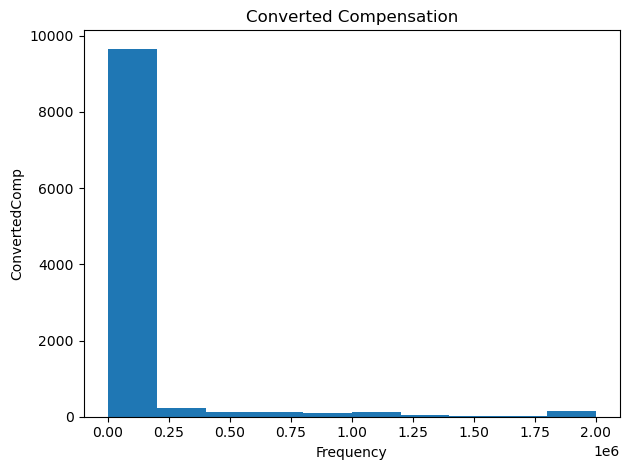

In [84]:
import matplotlib.pyplot as plt
df = pd.read_sql_query("SELECT * FROM master", conn)
df
ax=df["ConvertedComp"].plot(kind='hist', bins=10)
ax.set_title("Converted Compensation")
ax.set_xlabel("Frequency")
ax.set_ylabel("ConvertedComp")

plt.tight_layout()
plt.show()


### Box Plots


Plot a box plot of `Age.`


Text(0.5, 1.0, 'Age of Respondents')

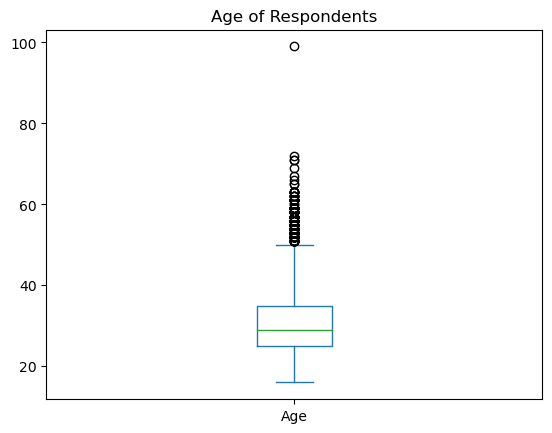

In [80]:
import matplotlib.pyplot as plt
df = pd.read_sql_query("SELECT * FROM master", conn)
df
df["Age"].plot(kind='box')
plt.title("Age of Respondents")




## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


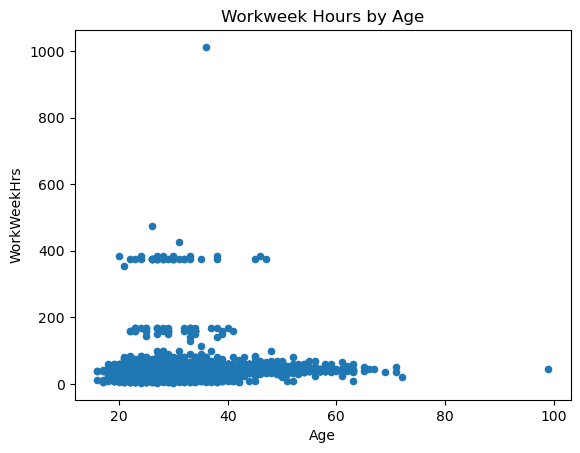

In [24]:
import matplotlib.pyplot as plt
df.plot(x='Age', y='WorkWeekHrs', kind='scatter')
plt.title("Workweek Hours by Age")
plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


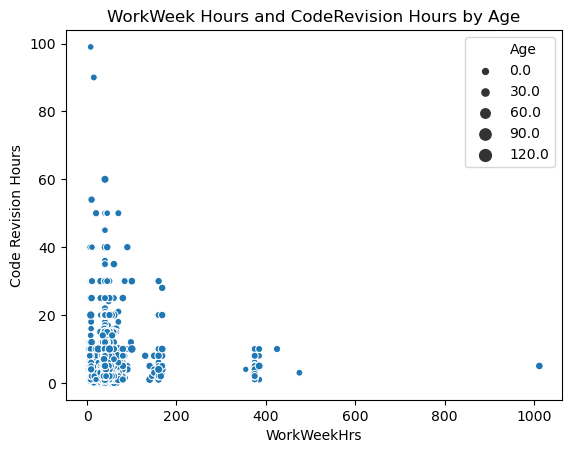

In [38]:
import seaborn as sns
QUERY = """

SELECT Age,ConvertedComp,WorkWeekHrs,CodeRevHrs

FROM master

"""

df = pd.read_sql_query(QUERY,conn)
size = df['Age']
sns.scatterplot(data=df,x='WorkWeekHrs', y='CodeRevHrs',size=size)
plt.xlabel('WorkWeekHrs')
plt.ylabel('Code Revision Hours')
plt.title('WorkWeek Hours and CodeRevision Hours by Age')
plt.show()  


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


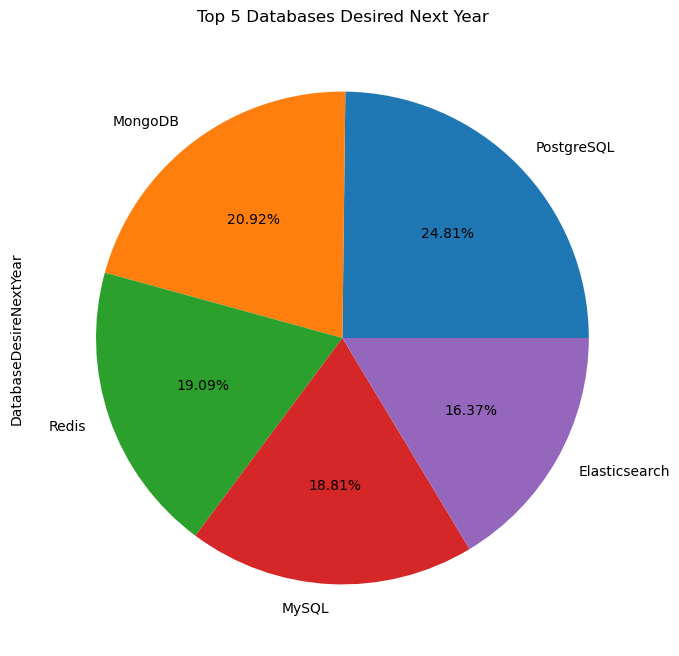

In [141]:
QUERY = """

SELECT *

FROM DatabaseDesireNextYear

"""

df = pd.read_sql_query(QUERY,conn)
df_pc= df['DatabaseDesireNextYear'].value_counts()
df_pc=df_pc.head(5)

df_pc.plot(kind='pie',figsize= (8,8), autopct='%1.2f%%') 
plt.title("Top 5 Databases Desired Next Year")
plt.show()




### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


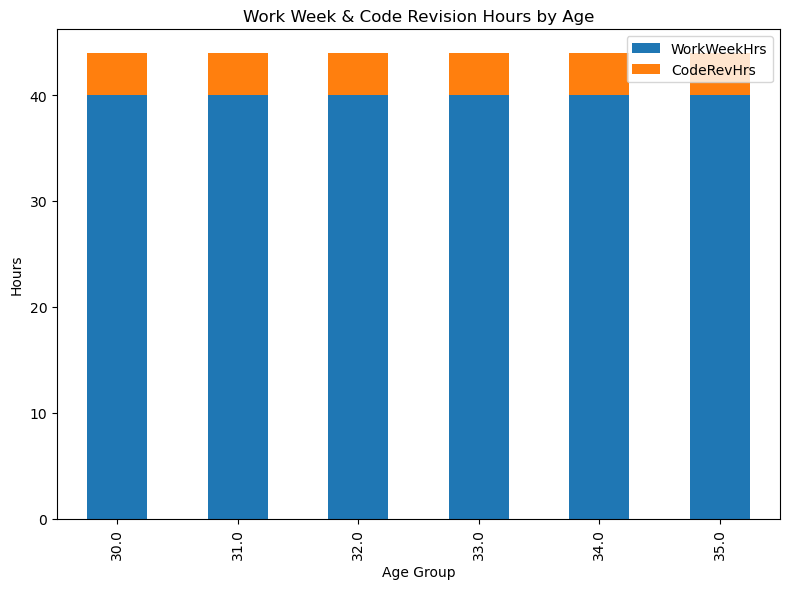

In [69]:
QUERY = """

SELECT Age,WorkWeekHrs,CodeRevHrs

FROM master

"""

# Read into dataframe
df = pd.read_sql_query(QUERY, conn)   

# Filter age 30-35
df = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

# Groupby and plot  
grouped = df.groupby('Age').median()
ax = grouped.plot(kind='bar', stacked=True, figsize=(8, 6))

# Chart formatting
ax.set_xlabel("Age Group")
ax.set_ylabel("Hours")
ax.set_title("Work Week & Code Revision Hours by Age")
ax.legend(['WorkWeekHrs','CodeRevHrs']) 

ax.set_xticklabels(grouped.index.values) # x-tick labels 

plt.tight_layout()
plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age'>

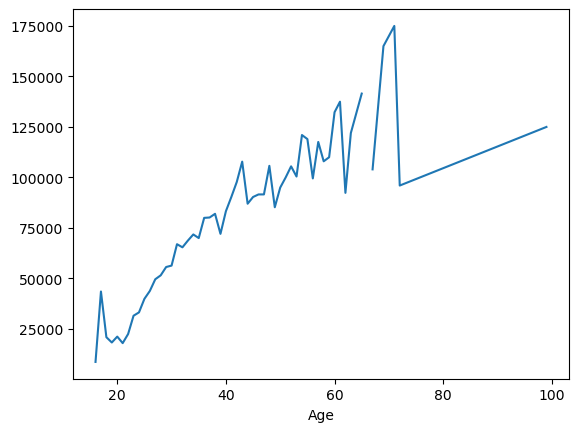

In [72]:
QUERY = """

SELECT Age,ConvertedComp

FROM master

"""
df_age = pd.read_sql_query(QUERY,conn)
df_age = df_age.groupby(by='Age')['ConvertedComp'].median()
df_age.plot()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


Text(0.5, 1.0, 'Count of Primary Developer Respondents')

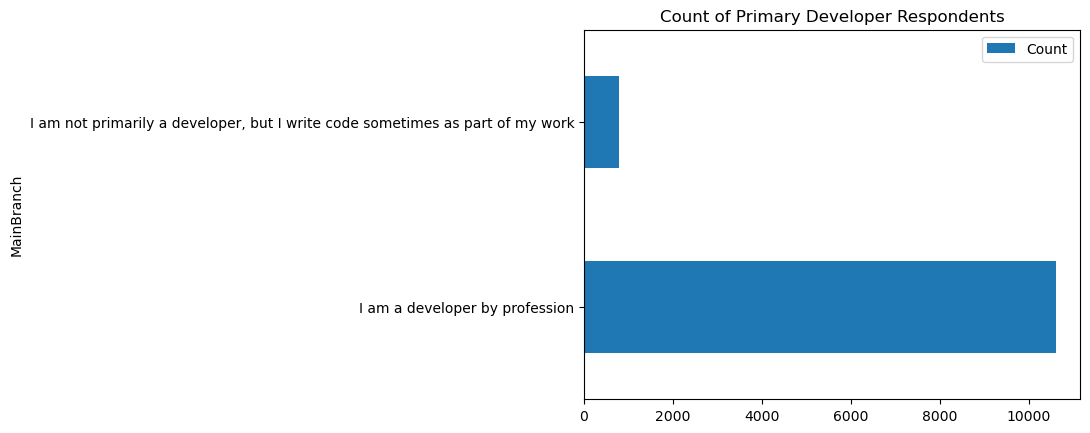

In [77]:
QUERY = """
SELECT MainBranch,count(*) as Count
FROM master group by MainBranch
"""


df = pd.read_sql_query(QUERY,conn)
df.plot.barh(x='MainBranch', y='Count')
plt.title("Count of Primary Developer Respondents")



Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
